In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import torch
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
%pip install  tensorflow-gpu==2.6

     -------------------------------------- 423.3/423.3 MB 2.0 MB/s eta 0:00:00
  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 2.7/2.7 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 13.3/13.3 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 132.0/132.0 kB 3.9 MB/s eta 0:00:00
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30703 sha256=d89db1e0c361b3da3cd32d8ba1eccb66baf2eca4d39bb94d26ccb459eb1c0bd1Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
ultralytics 8.0.154 requires numpy>=1.22.2, but you have numpy 1.19.5 which is incompatible.
tensorflow-intel 2.14.0 requires absl-py>=1.0.0, but you have absl-py 0.15.0 which is incompatible.
tensorflow-intel 2.14.0 requires flatbuffers>=23.5.26, but you have flatbuffers 1.12 which is incompatible.
tensorflow-intel 2.14.0 requires keras<2.15,>=2.14.0, but you have keras 2.15.0 which is incompatible.
tensorflow-intel 2.14.0 requires numpy>=1.23.5, but you have numpy 1.19.5 which is incompatible.
pylint 2.14.5 requires typing-extensions>=3.10.0; python_version < "3.10", but you have typing-extensions 3.7.4.3 which is incompatible.
pydantic 1.10.13 requires typing-extensions>=4.2.0, but you have typing-extensions 3.7.4.3 which is incompatible.
onnxrun


  Stored in directory: c:\users\phann\appdata\local\pip\cache\wheels\3a\ce\7a\27094f689461801c934296d07078773603663dfcaca63bb064
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4855 sha256=23340942615bf49b12a2176c368cfa8f83ecd1f5c1d8c10d6a3dcd55cb6de6e8
  Stored in directory: c:\users\phann\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
  Created wheel for wrapt: filename=wrapt-1.12.1-cp39-cp39-win_amd64.whl size=33027 sha256=6b6c991c154522e5bb833537114c4214e6835b0b072b1f39dd741f02091f2279
  Stored in directory: c:\users\phann\appdata\local\pip\cache\wheels\98\23\68\efe259aaca055e93b08e74fbe512819c69a2155c11ba3c0f10
Successfully built clang termcolor wrapt
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.14.1
    Uninstalling wrapt-1.14.1:
      Successfully uninstalled wrapt-1.14.1
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.8.0
    Uninst

local data

In [3]:
import os
train_path = r"C:\Users\phann\Downloads\food classify.v2i.folder\train"  # Training path
test_path = r"C:\Users\phann\Downloads\food classify.v2i.folder\test" # Testing path
vail_path =r"C:\Users\phann\Downloads\food classify.v2i.folder\valid"
categories = os.listdir(train_p     ath)  # Name of each class/cat

roboflow

In [ ]:
!curl -L "https://public.roboflow.com/ds/[YOUR-KEY-HERE]" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
%cd /content/
%mkdir images/
%mv train images/train
%mv test images/test
%mv valid images/valid

In [ ]:
import tensorflow_datasets as tfds
builder = tfds.folder_dataset.ImageFolder('images/')
print(builder.info)
raw_train = builder.as_dataset(split='train', shuffle_files=True)
raw_test = builder.as_dataset(split='test', shuffle_files=True)
raw_valid = builder.as_dataset(split='valid', shuffle_files=True)

In [ ]:
IMG_SIZE = 224 # All images will be resized to 160x160

def format_example(pair):
  image, label = pair['image'], pair['label']
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

In [ ]:
train = raw_train.map(format_example)
validation = raw_valid.map(format_example)
test = raw_test.map(format_example)

In [6]:
batch_size = 32
img_height = 224
img_width = 224

TRAIN DATA

In [ ]:
from sklearn.model_selection import train_test_split


test_size = 0.2

# Use train_test_split to split the data and labels into training and test sets
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=test_size, random_state=42)

# Print the size of the resulting sets
print(f"Training Data Shape: {train_data.shape}")
print(f"Testing Data Shape: {test_data.shape}")
print(f"Training Labels Shape: {train_labels.shape}")
print(f"Testing Labels Shape: {test_labels.shape}")

In [86]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    label_mode='categorical',  # 'categorical' for one-hot encoding of labels
    class_names=categories
)

Found 15415 files belonging to 22 classes.


In [87]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  vail_path,
  image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    label_mode='categorical',  # 'categorical' for one-hot encoding of labels
    class_names=categories
)

Found 2569 files belonging to 22 classes.


In [89]:
# Create the test dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    label_mode='categorical',  # 'categorical' for one-hot encoding of labels
    class_names=categories
)


Found 2568 files belonging to 22 classes.


In [90]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [91]:
normalization_layer = layers.Rescaling(1./255)

In [92]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [14]:
base_model = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    weights='imagenet',  # Use pre-trained weights
    input_tensor=None,
    input_shape=None,
    pooling='max'
)

# Add your custom classification layer
x = base_model.output
x = tf.keras.layers.Dense(22, activation='softmax')(x)

# Create a new model
model = tf.keras.Model(inputs=base_model.input, outputs=x)


In [15]:
custom_optimizer = Adam(learning_rate=1e-4)

# Assuming 'model' is your TensorFlow model
with tf.device('/GPU:0'):
    model.compile(
        optimizer=custom_optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )


In [16]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, None, None, 64)       0         ['conv1_conv[0][0]']          
                                                                                              

In [17]:
combined_train_ds = train_ds.concatenate(val_ds)


In [18]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

Epoch 1/10



c:\Users\phann\anaconda3\envs\autocheckout\lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



482/482 [==============================] - 1911s 4s/step - loss: 1.7765 - accuracy: 0.6298 - val_loss: 0.0929 - val_accuracy: 0.9727
Epoch 2/10
482/482 [==============================] - 1947s 4s/step - loss: 0.2335 - accuracy: 0.9272 - val_loss: 0.0751 - val_accuracy: 0.9801
Epoch 3/10
482/482 [==============================] - 1939s 4s/step - loss: 0.0403 - accuracy: 0.9892 - val_loss: 0.0642 - val_accuracy: 0.9813
Epoch 4/10
482/482 [==============================] - 1991s 4s/step - loss: 0.0253 - accuracy: 0.9940 - val_loss: 0.0574 - val_accuracy: 0.9856
Epoch 5/10
482/482 [==============================] - 1987s 4s/step - loss: 0.0955 - accuracy: 0.9726 - val_loss: 0.1292 - val_accuracy: 0.9638
Epoch 6/10
482/482 [==============================] - 1933s 4s/step - loss: 0.1617 - accuracy: 0.9485 - val_loss: 0.0673 - val_accuracy: 0.9829
Epoch 7/10
482/482 [==============================] - 1929s 4s/step - loss: 0.0617 - accuracy: 0.9800 - val_loss: 0.0382 - val_accuracy: 0.9883
Ep

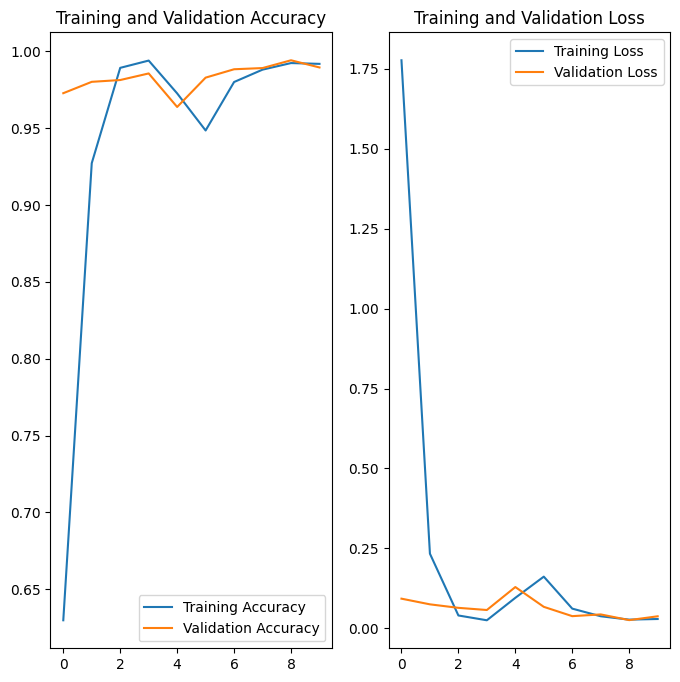

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [97]:
base_model.trainable = True

In [98]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  191


In [100]:

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4/10),
              metrics=['accuracy'])

In [103]:
fine_tune_epochs = 10
total_epochs =  20 + fine_tune_epochs

history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch =  history.epoch[-1],
                         validation_data=val_ds)

Epoch 10/30


482/482 [==============================] - 1265s 3s/step - loss: 0.0734 - accuracy: 0.9889 - val_loss: 0.0030 - val_accuracy: 0.9946
Epoch 11/30
482/482 [==============================] - 1419s 3s/step - loss: 0.0029 - accuracy: 0.9993 - val_loss: 0.0022 - val_accuracy: 0.9957
Epoch 12/30
482/482 [==============================] - 1176s 2s/step - loss: 9.3296e-04 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 0.9957
Epoch 13/30
482/482 [==============================] - 1174s 2s/step - loss: 5.8251e-04 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 0.9957
Epoch 14/30
482/482 [==============================] - 1181s 2s/step - loss: 4.3068e-04 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 0.9961
Epoch 15/30
482/482 [==============================] - 1174s 2s/step - loss: 3.4159e-04 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 0.9961
Epoch 16/30
482/482 [==============================] - 1167s 2s/step - loss: 2.8313e-04 - accuracy: 1.0000 - val_loss: 0.0018 

In [107]:
model.save("food_class_resnet50v2.keras")


In [111]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

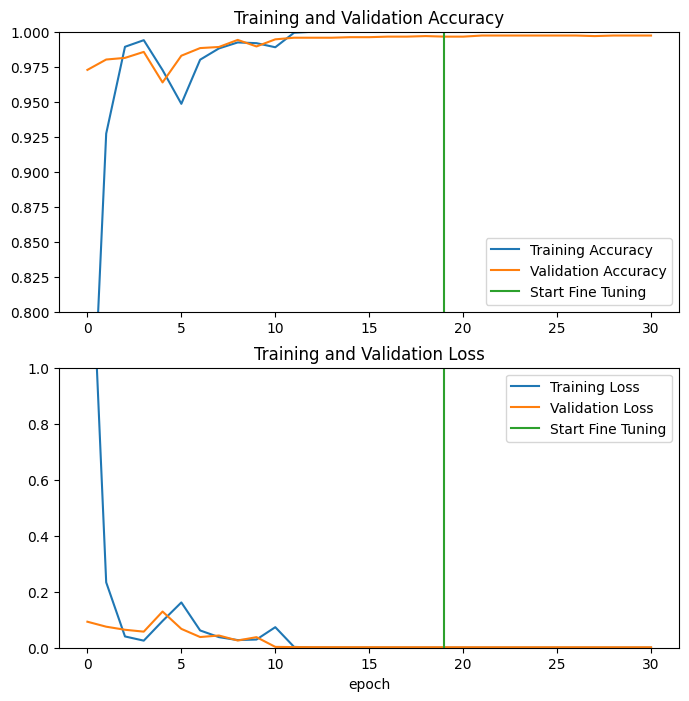

In [114]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([20-1,20-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([20-1,20-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [122]:
print(categories)

['bap bo bam', 'bi', 'ca kho', 'ca kho voi ga chien', 'ca rot', 'ca rot mieng', 'cai tim', 'com gao luc', 'com trang', 'cu tim', 'dua leo', 'ga chien', 'mi xao', 'my y', 'rau cai', 'sot bap', 'sot bo bam', 'sot ca chua', 'sot me', 'sot xuc xich', 'thi bam', 'trung']


1/1 [==============================] - 1s 1s/step
Predicted class: 18  -  sot me


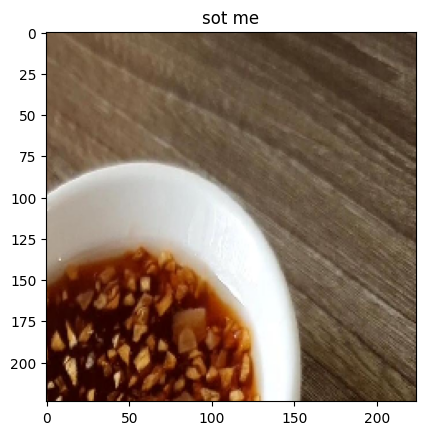

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np


# Load your trained ResNet model
model_path = r"C:\Users\phann\Documents\Visual code\food_class_resnet50v2.keras"
model = load_model(model_path)

# Load the test imageport
test_image_path = r"C:\Users\phann\Downloads\food classify.v2i.folder\train\sot me\img_0899_jpg.rf.abee4850baa6a09b4c070d76f1a73a30.jpg"
test_image = load_img(test_image_path, target_size=(224, 224))

# Convert the test image into a NumPy array
test_image_array = img_to_array(test_image)

# Expand the dimensions of the test image
test_image_array = np.expand_dims(test_image_array, axis=0)

# Make predictions
predictions = model.predict(test_image_array)

# Get the predicted class label
predicted_class = np.argmax(predictions[0])

# Load the class labels (replace 'categories' with your actual class labels)
class_labels = categories
# Print the predicted class label and category
print("Predicted class:", predicted_class, " - ", class_labels[predicted_class])

# Show the test image
plt.imshow(test_image)
plt.title(class_labels[predicted_class])
plt.show()

1/1 [==============================] - 0s 224ms/step
Predicted class: 4  -  ca rot


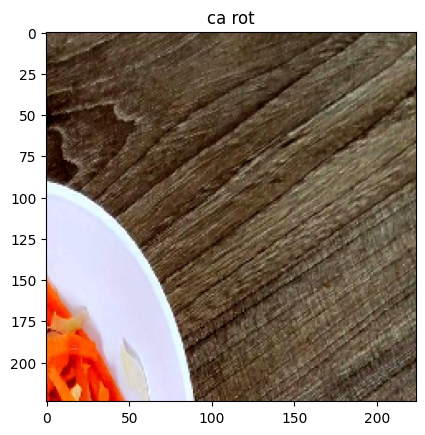

In [7]:
# Dummy input for model warm-up
dummy_input = np.random.rand(1, 224, 224, 3)  # Adjust shape based on your input

# Warm-up the model
_ = model.predict(dummy_input)

# Load the test image
test_image_path = r"C:\Users\phann\Downloads\food classify.v2i.folder\test\ca rot\img_1647_jpg.rf.fe134fd290e56a2874e407913cb574ac.jpg"
test_image = load_img(test_image_path, target_size=(224, 224))

# Convert the test image into a NumPy array
test_image_array = img_to_array(test_image)

# Expand the dimensions of the test image
test_image_array = np.expand_dims(test_image_array, axis=0)

# Make predictions
predictions = model.predict(test_image_array)

# Get the predicted class label
predicted_class = np.argmax(predictions[0])

# Load the class labels (replace 'categories' with your actual class labels)
class_labels = categories  # Replace with your actual class labels

# Print the predicted class label and category
print("Predicted class:", predicted_class, " - ", class_labels[predicted_class])

# Show the test image
plt.imshow(test_image)
plt.title(class_labels[predicted_class])
plt.show()

1/1 [==============================] - 0s 146ms/step


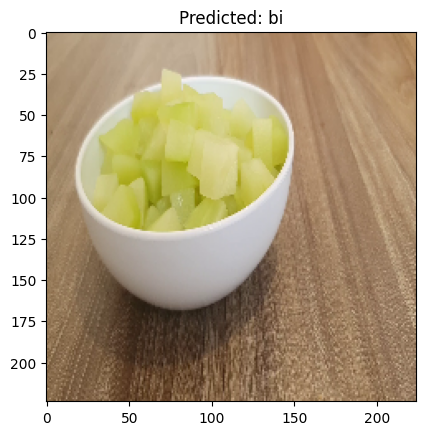

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1338: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


In [157]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt


# Open a video capture object with the path to your video file
video_path = r"C:\Users\phann\Downloads\20231115_133434.mp4" # Replace 'your_video_path.mp4' with the actual path to your video file
cap = cv2.VideoCapture(video_path)

# Create a Matplotlib figure for displaying frames
fig, ax = plt.subplots()

while True:
    # Read a frame from the video
    ret, frame = cap.read()

    # Break the loop if the video has ended
    if not ret:
        break

    # Resize the frame to match the input size of the model
    frame = cv2.resize(frame, (224, 224))

    # Convert the frame into a NumPy array
    frame_array = img_to_array(frame)

    # Expand the dimensions of the frame
    frame_array = np.expand_dims(frame_array, axis=0)

    # Make predictions
    predictions = model.predict(frame_array)

    # Get the predicted class label
    predicted_class = np.argmax(predictions[0])

    # Display the frame with the predicted class label using Matplotlib
    ax.clear()
    ax.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    ax.set_title(f"Predicted: {class_labels[predicted_class]}")
    plt.pause(0.01)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close the Matplotlib window
cap.release()
plt.close()
